In [51]:
# Data handling and EDA tools
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the 'final_df.csv' file into a pandas dataframe
df = pd.read_csv('./final_df.csv')

C:\Users\ALPHONCE.ONIALA\AppData\Local\Temp\ipykernel_29716\1155386301.py:2: DtypeWarning: Columns (1,2,3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./final_df.csv')


In [4]:
# Take a look at the first 5 rows of the dataframe
df.head()

fridge_temperature temp_condition door_state sphone_signal  latitude  \
0               13.10          high           0             0       0.0   
1                8.65          high           0             0       0.0   
2                2.00           low           0             0       0.0   
3                4.80           low           0             0       0.0   
4               10.70          high           0             0       0.0   

   longitude  FC1_Read_Input_Register  FC2_Read_Discrete_Value  \
0        0.0                        0                        0   
1        0.0                        0                        0   
2        0.0                        0                        0   
3        0.0                        0                        0   
4        0.0                        0                        0   

   FC3_Read_Holding_Register  FC4_Read_Coil  motion_status light_status  \
0                        0.0            0.0            0.0            0   
1                        0.0            0.0            0.0            0   
2                        0.0            0.0            0.0            0   
3                        0.0            0.0            0.0            0   
4                        0.0            0.0            0.0            0   

   current_temperature  thermostat_status  temperature  pressure  humidity  \
0                  0.0                0.0          0.0       0.0       0.0   
1                  0.0                0.0          0.0       0.0       0.0   
2                  0.0                0.0          0.0       0.0       0.0   
3                  0.0                0.0          0.0       0.0       0.0   
4                  0.0                0.0          0.0       0.0       0.0   

  iot_component_type  label    type  
0             fridge    0.0  normal  
1             fridge    0.0  normal  
2             fridge    0.0  normal  
3             fridge    0.0  normal  
4             fridge    0.0  normal

In [5]:
# Get the overall information about each column in the dataset and their values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163770 entries, 0 to 163769
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fridge_temperature         163770 non-null  float64
 1   temp_condition             163770 non-null  object 
 2   door_state                 163770 non-null  object 
 3   sphone_signal              163770 non-null  object 
 4   latitude                   163770 non-null  float64
 5   longitude                  163770 non-null  float64
 6   FC1_Read_Input_Register    163770 non-null  int64  
 7   FC2_Read_Discrete_Value    163770 non-null  int64  
 8   FC3_Read_Holding_Register  163770 non-null  float64
 9   FC4_Read_Coil              163770 non-null  float64
 10  motion_status              163770 non-null  float64
 11  light_status               163770 non-null  object 
 12  current_temperature        163770 non-null  float64
 13  thermostat_status          16

##### From the above descriptive information we can verify that our dataset contains all of our values in the required datatype and 163770 values for each of our columns are not null. Check for "non-null" values will be handled in the next cell.

In [6]:
# Sanity check for null values in each column in the dataset
df.isna().sum()

fridge_temperature           0
temp_condition               0
door_state                   0
sphone_signal                0
latitude                     0
longitude                    0
FC1_Read_Input_Register      0
FC2_Read_Discrete_Value      0
FC3_Read_Holding_Register    0
FC4_Read_Coil                0
motion_status                0
light_status                 0
current_temperature          0
thermostat_status            0
temperature                  0
pressure                     0
humidity                     0
iot_component_type           0
label                        0
type                         0
dtype: int64

In [7]:
# Preparing a summary statistics for all the numerical columns in the dataset
df.describe()

fridge_temperature       latitude      longitude  \
count       163770.000000  163770.000000  163770.000000   
mean             0.710639      13.601426      15.298458   
std              2.300874      44.130344      47.061523   
min              0.000000       0.000000       0.000000   
25%              0.000000       0.000000       0.000000   
50%              0.000000       0.000000       0.000000   
75%              0.000000       0.000000       0.000000   
max             14.000000     531.562225     552.255356   

       FC1_Read_Input_Register  FC2_Read_Discrete_Value  \
count            163770.000000            163770.000000   
mean               4893.536698              4847.847585   
std               13736.518832             13670.239351   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               65527.000000             65534.000000   

       FC3_Read_Holding_Register  FC4_Read_Coil  motion_status  \
count              163770.000000  163770.000000  163770.000000   
mean                 4791.142315    4884.769738       0.054601   
std                 13571.700469   13709.299932       0.227200   
min                     0.000000       0.000000       0.000000   
25%                     0.000000       0.000000       0.000000   
50%                     0.000000       0.000000       0.000000   
75%                     0.000000       0.000000       0.000000   
max                 65523.000000   65534.000000       1.000000   

       current_temperature  thermostat_status    temperature       pressure  \
count        163770.000000      163770.000000  163770.000000  163770.000000   
mean              3.931634           0.122758       4.978203       0.001963   
std               9.846029           0.328160      12.464080       1.276404   
min               0.000000           0.000000       0.000000     -12.065426   
25%               0.000000           0.000000       0.000000       0.000000   
50%               0.000000           0.000000       0.000000       0.000000   
75%               0.000000           0.000000       0.000000       0.000000   
max              34.996237           1.000000      49.474056      11.126101   

            humidity          label  
count  163770.000000  163770.000000  
mean        5.744785       0.724113  
std        17.587229       0.446961  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max        99.448695       1.000000

<Axes: title={'center': 'Distribution of Cyber Security Attacks on IoT Devices'}, ylabel='type'>

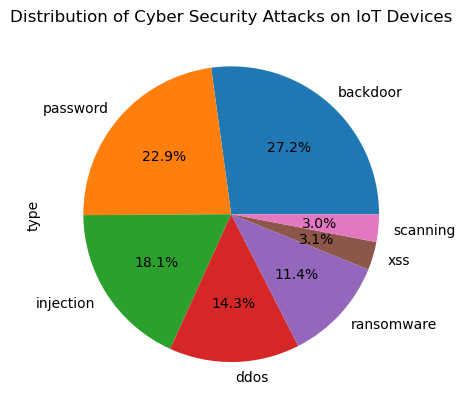

In [8]:
# This visualization is a pie chart showing the overall distribution of cyberattacks in IoT devices
df['type'][df['type'] != 'normal'].value_counts().plot(kind='pie', title="Distribution of Cyber Security Attacks on IoT Devices", autopct='%1.1f%%')

##### As depicted from the above visualization we can see that 7 different types of cyber attacks that are targeted at various IoT devices out of this backdoor attack is the most prevailing type of cyber security threat on IoT devices. Moreover, the figure shows password and backdoor attacks contribute to almost half of the cybersecurity attacks on IoT devices. Scanning attack and XSS attacks are the least commonly observed cyber attack types in case of IoT devices.

<Axes: title={'center': 'Share of Normal and Cyber Attack Observations'}, xlabel='System Behaviour Categories', ylabel='Count of Observations'>

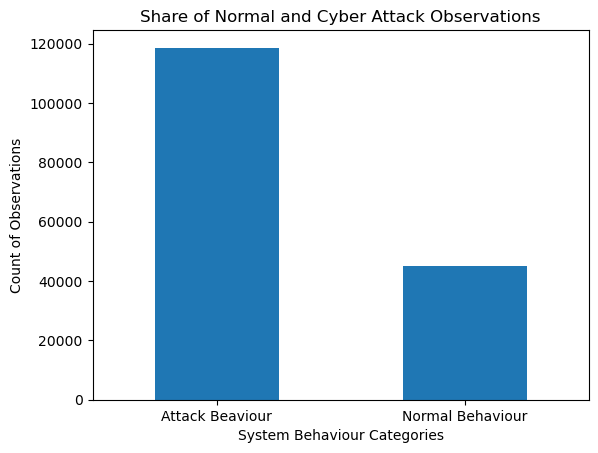

In [9]:
df['label'].replace({1: 'Attack Beaviour', 0: 'Normal Behaviour'}).value_counts().plot(kind='bar', title="Share of Normal and Cyber Attack Observations", xlabel='System Behaviour Categories', ylabel='Count of Observations', rot=0)

##### From the previous visualization we might conclude that our dataset is a bit unbalanced for binary classification but for multiclass classification we have 7 classes represented by about 110000 observations and the reset representing the normal system behaviour which is the most frequent case in most senarios. Further this fact is reinforced by the next visualization 

<Axes: title={'center': 'Share of Normal and Cyber Attack Observations'}, xlabel='System Behaviour Categories', ylabel='Count of Observations'>

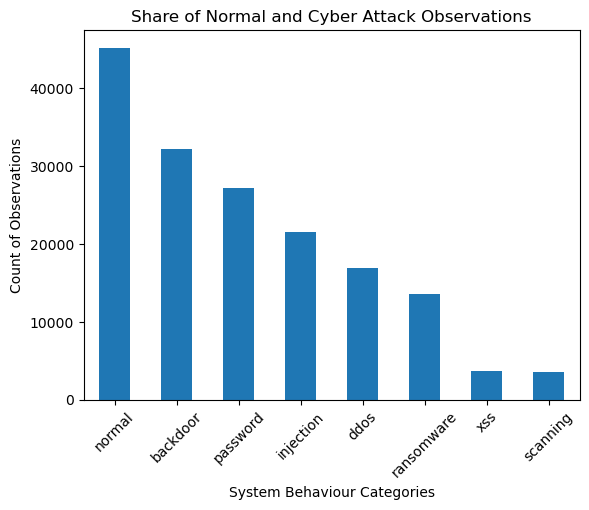

In [10]:
df['type'].value_counts().plot(kind='bar', title="Share of Normal and Cyber Attack Observations", xlabel='System Behaviour Categories', ylabel='Count of Observations', rot=45)

##### As further can be understood from this visualzation our dataset is gives a balanced focus for the each types of cybersecurity crime frequencies in which the most frequent are backdoor and password attack

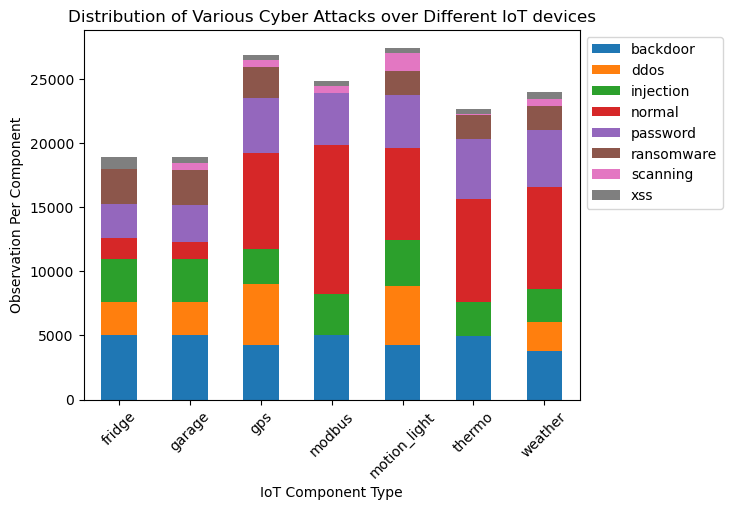

In [11]:
# Stack bar chart to compare the distribution of cyber attack in each iot component
ax = df.groupby('iot_component_type')['type'].value_counts().unstack().plot(kind='bar', stacked=True, title="Distribution of Various Cyber Attacks over Different IoT devices", xlabel='IoT Component Type', ylabel='Observation Per Component', rot=45)
ax.legend(bbox_to_anchor=(1, 1))

### Component Level Data Explorations

In [12]:
fridge_df = df[['fridge_temperature','temp_condition', 'iot_component_type', 'label', 'type']][df['iot_component_type'] == 'fridge']

In [13]:
fridge_df.head()

fridge_temperature temp_condition iot_component_type  label    type
0               13.10          high              fridge    0.0  normal
1                8.65          high              fridge    0.0  normal
2                2.00           low              fridge    0.0  normal
3                4.80           low              fridge    0.0  normal
4               10.70          high              fridge    0.0  normal

In [13]:
fridge_df['fridge_temperature'].describe()

count    18910.000000
mean         6.154484
std          3.513570
min          1.000000
25%          3.050000
50%          5.500000
75%          8.800000
max         14.000000
Name: fridge_temperature, dtype: float64

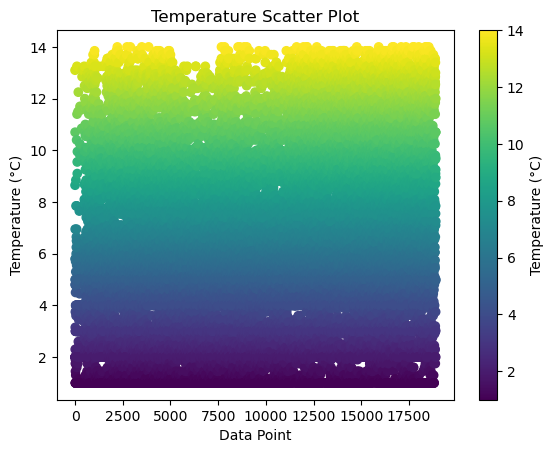

In [14]:
# The distribution of values acros the fridge_temprature column
plt.scatter(range(len(fridge_df['fridge_temperature'])), fridge_df['fridge_temperature'], c=fridge_df['fridge_temperature'], cmap='viridis')

plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Scatter Plot')
plt.xlabel('Data Point')
plt.ylabel('Temperature (°C)')

plt.show()

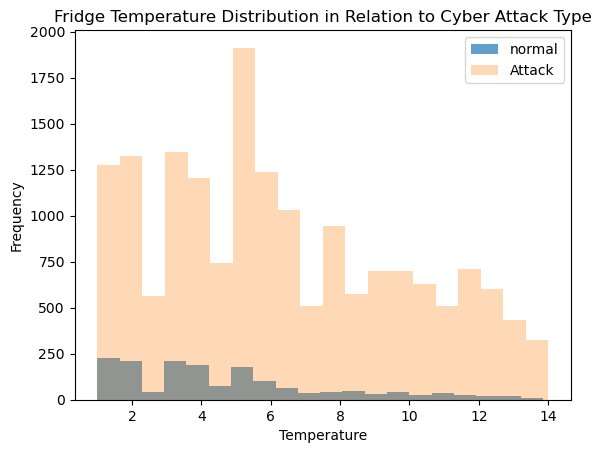

In [16]:
normal_temps = fridge_df[fridge_df['type'] == 'normal']['fridge_temperature']
fraud_temps = fridge_df[fridge_df['type'] != 'normal']['fridge_temperature']

plt.hist(normal_temps, bins=20, alpha=0.7, label='normal')
plt.hist(fraud_temps, bins=20, alpha=0.3, label='Attack')
plt.title('Fridge Temperature Distribution in Relation to Cyber Attack Type')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

It can be seen from the execution of the cell above that for lower values of the fridge_temprature attribute there is a great frequency of attack behviours. However while the distribution of fridge_temprature values starts to get higher the values frequency start to platue and The observance of the portions of normal behavior starts to fadeout.

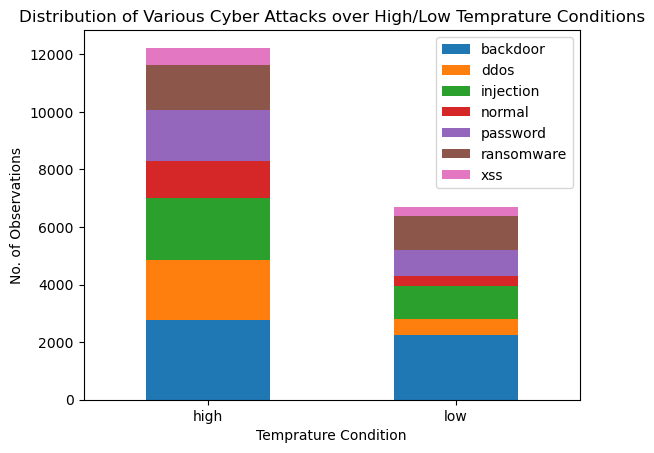

In [20]:
ax = fridge_df.groupby('temp_condition')['type'].value_counts().unstack().plot(kind='bar', stacked=True, title="Distribution of Various Cyber Attacks over High/Low Temprature Conditions", xlabel='Temprature Condition', ylabel='No. of Observations', rot=0)
ax.legend(bbox_to_anchor=(1, 1))

The plot above shows the distribution of cyber attacks over high/low values for the temp_condition attribute of the fridge dataset. As DDOS, Injection and Backdoor cyber attack types are contributing to much of the cyber attack headed towards fridge device.

In [21]:
fridge_df.groupby('temp_condition')['type'].value_counts().unstack()

type            backdoor  ddos  injection  normal  password  ransomware  xss
temp_condition                                                              
high                2768  2080       2164    1271      1787        1554  602
low                 2232   566       1148     355       896        1189  298

The execution of this cell also reinforce the fact that DDOS, Injection and Password are having the highest contribution to
Cyber attacks on fridge IoT component.

##### We conclude that High temprature conditions have almost double of the records from cybersecurity attacks on Low temprature conditions. It is clear that backdoor and ransomeware attack are almost equally likely to happen on both temprature conditions. 

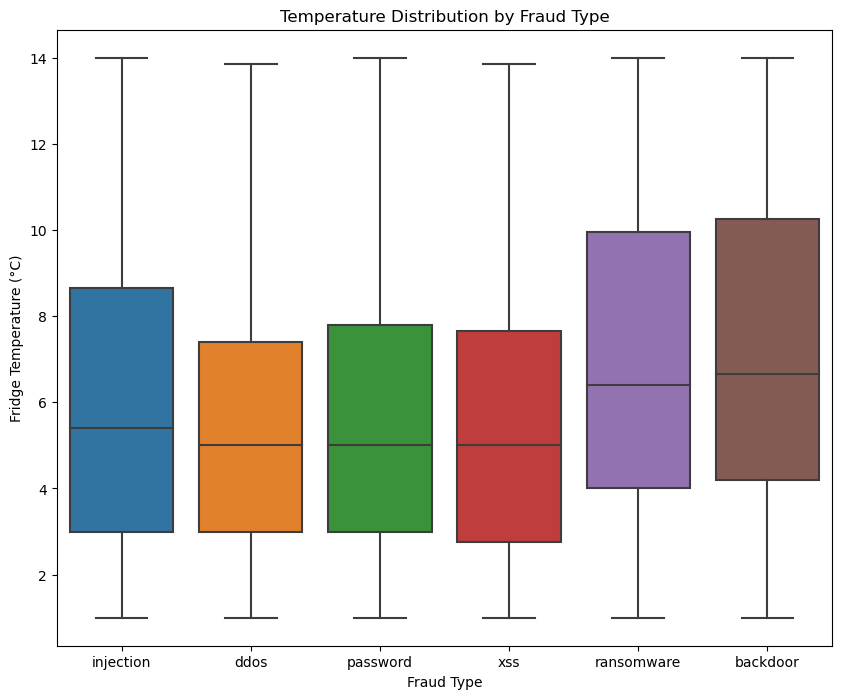

In [19]:
# Visualize the distribution of temprature for each fraud type using box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='type', y='fridge_temperature', data=fridge_df[fridge_df['type'] != 'normal'])

plt.title("Temperature Distribution by Fraud Type")
plt.xlabel('Fraud Type')
plt.ylabel('Fridge Temperature (°C)')

plt.show()

From the execution of the cell above we can see that Injection, DDOS and Password attacks tend to start to occur at least at the
temprature value. Where as xss fraud type could even occur at tempreture even below where the other 3 can happen this can tell us inspite of having difficulties to differentiate between the three of the cyber attack types it could tell us whether it is xss or not for xss cyber attacks are much to happen on lower temprature values.

In [22]:
garage_df = df[['door_state','sphone_signal', 'iot_component_type', 'label', 'type']][df['iot_component_type'] == 'garage']

In [23]:
garage_df.head()

door_state sphone_signal iot_component_type  label    type
18910     closed       false               garage    0.0  normal
18911     closed       false               garage    0.0  normal
18912     closed       false               garage    0.0  normal
18913     closed       false               garage    0.0  normal
18914     closed       false               garage    0.0  normal

<Axes: title={'center': 'Distribution of Various Cyber Attacks over Door State Column'}, xlabel='Door State', ylabel='No. of Observations'>

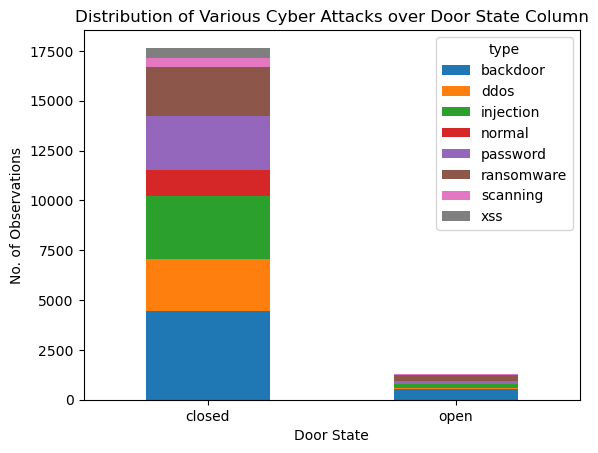

In [24]:
garage_df.groupby('door_state')['type'].value_counts().unstack().plot(kind='bar', stacked=True, title="Distribution of Various Cyber Attacks over Door State Column", xlabel='Door State', ylabel='No. of Observations', rot=0)

The figure above shows us that the distribution of the cyber attack types is very unbalanced in each of the doors state values(Closed/Open). Bute still Backdoor and Injection are represented in most of the observations.

In [25]:
garage_df.groupby('door_state')['type'].value_counts().unstack()

type        backdoor  ddos  injection  normal  password  ransomware  scanning  \
door_state                                                                      
closed          4475  2588       3147    1311      2709        2461       471   
open             525    56        202      21       139         282        58   

type        xss  
door_state       
closed      494  
open         20

<Axes: title={'center': 'Distribution of Normal/Attack System Behaviour over Door State Column'}, xlabel='Door State', ylabel='No. of Observations'>

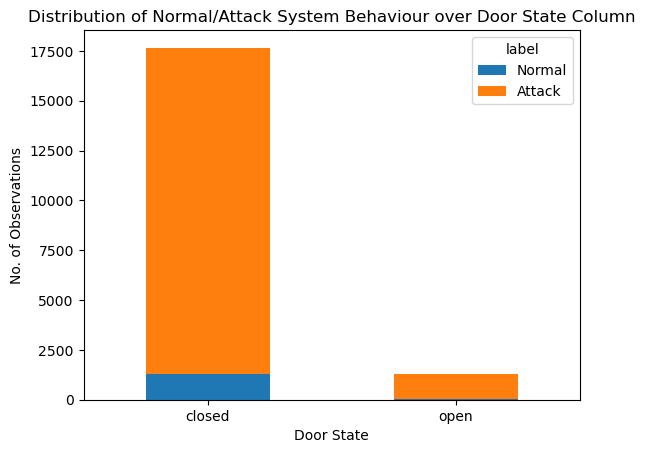

In [29]:
garage_df.groupby('door_state')['label'].value_counts().unstack().rename(columns = {0.0: 'Normal', 1.0: 'Attack'}).plot(kind='bar', stacked=True, title="Distribution of Normal/Attack System Behaviour over Door State Column", xlabel='Door State', ylabel='No. of Observations', rot=0)

We can depict from the figure above that the 'Open' Door state had almost no normal behavior expressed in the dataset.

<Axes: title={'center': 'Occurence of Cyber Attacks in case of Garage Door'}, ylabel='type'>

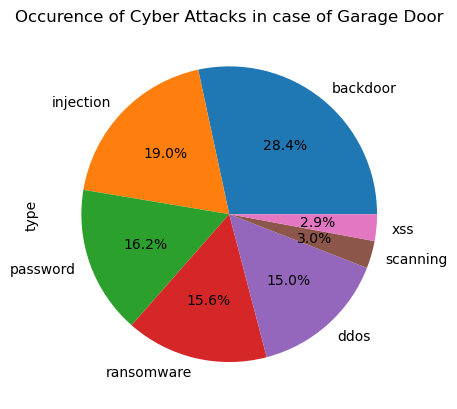

In [30]:
garage_df['type'][garage_df['type'] != 'normal'].value_counts().plot(kind='pie', title="Occurence of Cyber Attacks in case of Garage Door", autopct='%1.1f%%')

The figure above shows how cyberattack types are distributed around the Garage Door Iot Component and it shows Infact restrains
that backdoor, password and injection attack types are the most prevalent.

In [32]:
gps_tracker_df = df[['latitude', 'longitude', 'label', 'type']][df['iot_component_type'] == 'gps']

In [33]:
gps_tracker_df

latitude   longitude  label      type
37869    0.000000   10.000000    0.0    normal
37870    0.000000   10.000000    0.0    normal
37871    0.000000   10.000000    0.0    normal
37872    0.000000   10.000000    0.0    normal
37873    0.000000   10.000000    0.0    normal
...           ...         ...    ...       ...
64762  125.650854  138.004393    1.0  backdoor
64763  123.767097  133.325294    1.0  backdoor
64764  150.465785  163.530962    1.0  backdoor
64765  150.469309  163.594957    1.0  backdoor
64766  123.773065  133.466558    1.0  backdoor

[26898 rows x 4 columns]

In [35]:
gps_tracker_df['type'].value_counts()

normal        7474
ddos          4742
password      4308
backdoor      4252
injection     2763
ransomware    2378
scanning       550
xss            431
Name: type, dtype: int64

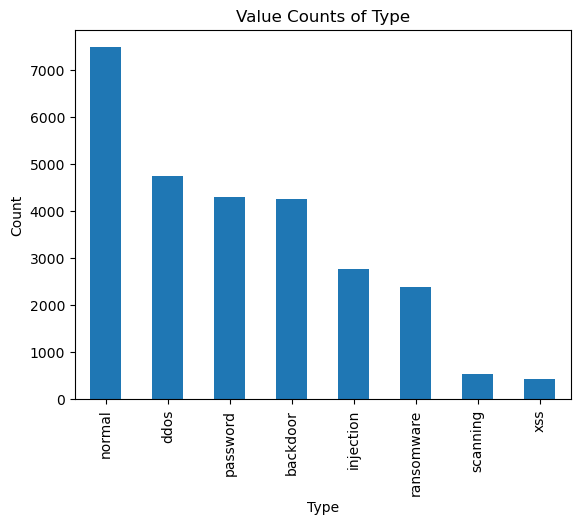

In [36]:
type_counts = gps_tracker_df['type'].value_counts()

type_counts.plot(kind='bar')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Value Counts of Type')

plt.show()

The figure above is showing how behavior type are distributed across the type columns of the gps_tracker dataframe. It shows an occurence of more than 7000 records are for normal device behaviours, where as attack types DDOS, Password, Backdoor are having nearly the same distributions. Moreover the cyber attack types scanning and xss are the least observed in case of gps_tracker.

In [37]:
modbus_df = df[['FC1_Read_Input_Register','FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil','label', 'type']][df['iot_component_type'] == 'modbus']

In [39]:
modbus_df.head()

FC1_Read_Input_Register  FC2_Read_Discrete_Value  \
64767                    11287                     3537   
64768                    11287                     3537   
64769                    11287                     3537   
64770                    53287                     1463   
64771                    53287                     1463   

       FC3_Read_Holding_Register  FC4_Read_Coil  label    type  
64767                    27844.0        30527.0    0.0  normal  
64768                    27844.0        30527.0    0.0  normal  
64769                    27844.0        30527.0    0.0  normal  
64770                    33518.0        23014.0    0.0  normal  
64771                    33518.0        23014.0    0.0  normal

<Axes: title={'center': 'Occurence of Cyber Attacks in case of Modbus'}, ylabel='type'>

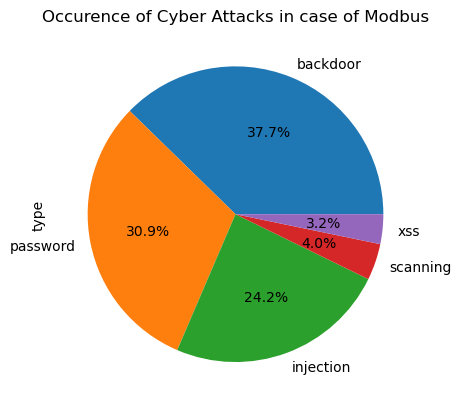

In [40]:
modbus_df['type'][modbus_df['type'] != 'normal'].value_counts().plot(kind='pie', title="Occurence of Cyber Attacks in case of Modbus", autopct='%1.1f%%')

The modbus device is only having few cyber attack type than others missing observations for DDOS and Ransomware. However Injection, Backdoor and Password still persist and also the low observation rate of xss and scanning cyber attack types is still persisting. 

In [41]:
motion_light_df = df[['motion_status','light_status','label','type']][df['iot_component_type'] == 'motion_light']

<Axes: title={'center': 'Distribution of Normal/Attack System Behaviour over Light Status Column'}, xlabel='Light Status', ylabel='No. of Observations'>

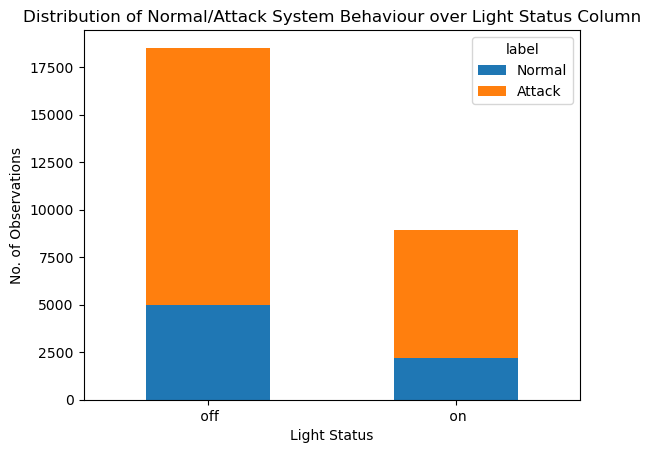

In [42]:
motion_light_df.groupby('light_status')['label'].value_counts().unstack().rename(columns={0.0: 'Normal', 1.0: 'Attack'}).plot(kind='bar', stacked=True, title="Distribution of Normal/Attack System Behaviour over Light Status Column", xlabel='Light Status', ylabel='No. of Observations', rot=0)

The image above is for the distribution of cyber attack in IoT devices however it is more balanced than the other distributions
observed above.

In [44]:
thermo_df = df[['current_temperature','thermostat_status','label','type']][df['iot_component_type'] == 'thermo']

<Axes: title={'center': 'Distribution of Various Cyber Attacks over Thermostat Status Column'}, xlabel='Door State', ylabel='No. of Observations'>

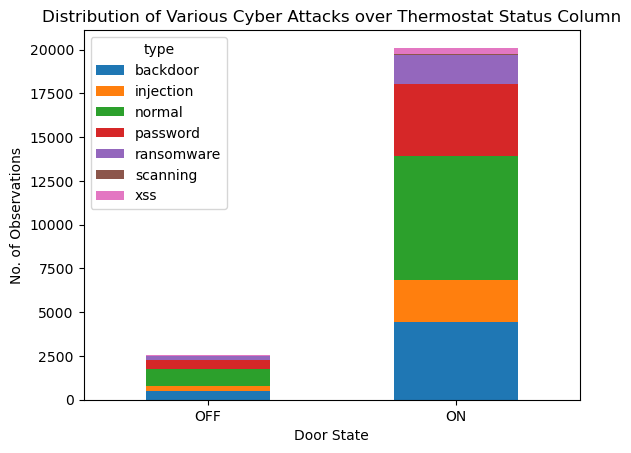

In [45]:
thermo_df['thermostat_status_name'] = thermo_df['thermostat_status'].map({0.0: 'OFF', 1.0: 'ON'})
thermo_df.groupby('thermostat_status_name')['type'].value_counts().unstack().plot(kind='bar', stacked=True, title="Distribution of Various Cyber Attacks over Thermostat Status Column", xlabel='Door State', ylabel='No. of Observations', rot=0)

Password, Injection and Backdoor have this whole persistant observation over our dataset. Which is making them the most prevalent types of cyber attacks on IoT devices. Eventhough the proportion of values for "OFF" value of the thermostat status is very small they have got the occurence of all types of cyber attacks.

In [48]:
weather_df = df[['temperature','pressure','humidity','label','type']][df['iot_component_type'] == 'weather']

In [49]:
weather_df

temperature   pressure   humidity  label      type
139792    31.788508   1.035000  32.036579    0.0    normal
139793    41.630997   1.035000  30.886165    0.0    normal
139794    42.256959   1.035000  19.755908    0.0    normal
139795    49.116581   1.035000  78.949621    0.0    normal
139796    24.017085   1.035000  40.001059    0.0    normal
...             ...        ...        ...    ...       ...
163765    21.549749 -11.019147  33.414768    1.0  backdoor
163766    22.003119   9.963753  51.545371    1.0  backdoor
163767    21.937641 -11.019147  33.414768    1.0  backdoor
163768    21.864028   9.963753  53.440696    1.0  backdoor
163769    22.236342 -11.019147  33.414768    1.0  backdoor

[23978 rows x 5 columns]

<Axes: title={'center': 'Share of Cyber Attacks and Normal Beahviour on Weather Dataset'}, ylabel='type'>

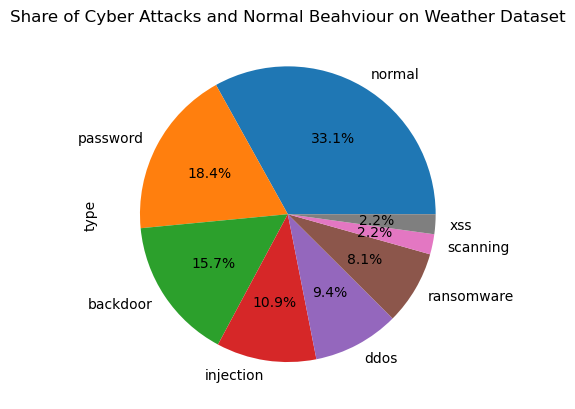

In [50]:
weather_df['type'].value_counts().plot(kind='pie', title="Share of Cyber Attacks and Normal Beahviour on Weather Dataset", autopct='%1.1f%%')